# 지역 특징점 검출과 매칭

## 코너 검출

In [10]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

### 해리스 코너 검출

#### skewed_chessboard.jpg

time to detect(Harris Corner) : 5.784 ms.
0.0026313693


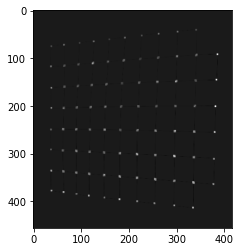

In [89]:
src = cv2.imread('./data/skewed_chessboard.jpg')

if src is None:
    print("Image load failed")
    sys.exit()

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
#gray = np.float32(gray)

tm = cv2.TickMeter()
tm.start()
harris = cv2.cornerHarris(gray, 2, 3, 0.04)
tm.stop()
print("time to detect(Harris Corner) : %4.3f ms."%tm.getTimeMilli())

print(harris.max())

harris_dilate = cv2.dilate(harris, None) #  팽창을 통해 코너점을 선명하게 시각화 하기 위해
plt.imshow(harris_dilate, cmap="gray")

# harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
# plt.imshow(harris_norm, cmap="gray")                        

In [90]:
thresh = 0.1 * harris.max()

dst = np.copy(src)
for y in range(harris.shape[0]):
    for x in range(harris.shape[1]):
        if harris[y, x] > thresh:
            cv2.circle(dst, (x, y), 1, (0, 0, 255), 1)

cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

#### building.jpg

0.010007293


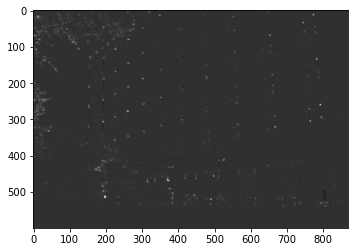

In [41]:
src = cv2.imread('./data/building.jpg')

if src is None:
    print("Image load failed")
    sys.exit()

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
#gray = np.float32(gray)
harris = cv2.cornerHarris(gray, 3, 3, 0.04)
print(harris.max())

harris_dilate = cv2.dilate(harris, None)
plt.imshow(harris_dilate, cmap="gray")

# harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
# plt.imshow(harris_norm, cmap="gray")   

In [47]:
thresh = 0.1 * harris.max()

dst = np.copy(src)
for y in range(harris.shape[0]):
    for x in range(harris.shape[1]):
        if harris[y, x] > thresh:
            if (harris[y, x] > harris[y-1, x] and    #non maximum suppression(NMS)
               harris[y, x] > harris[y+1, x] and
               harris[y, x] > harris[y, x-1] and
               harris[y, x] > harris[y, x+1]):
                cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)
            
cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

#### Workshop : waffle.jpg

0.0057372665


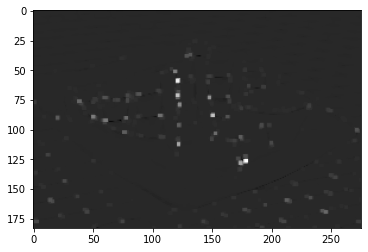

In [60]:
src = cv2.imread('./data/waffle.jpg')

if src is None:
    print("Image load failed")
    sys.exit()

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
#gray = np.float32(gray)
harris = cv2.cornerHarris(gray, 2, 3, 0.04)
print(harris.max())

harris_dilate = cv2.dilate(harris, None) #  팽창을 통해 코너점을 선명하게 시각화 하기 위해
plt.imshow(harris_dilate, cmap="gray")

# harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
# plt.imshow(harris_norm, cmap="gray")                        

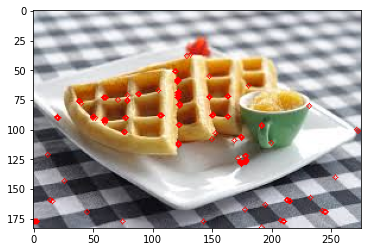

In [64]:
thresh = 0.1 * harris.max()

dst = np.copy(src)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

for y in range(harris.shape[0]):
    for x in range(harris.shape[1]):
        if harris[y, x] > thresh:
            cv2.circle(dst, (x, y), 2, (255, 0, 0), 1)

plt.imshow(dst)

### FAST 코너 검출

#### skewed_chessboard.jpg

time to detect(Harris Corner) : 0.440 ms.


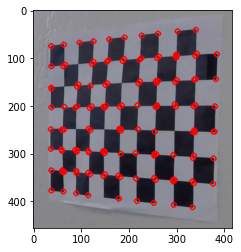

In [79]:
src = cv2.imread('./data/skewed_chessboard.jpg')

if src is None:
    print("Image load failed")
    sys.exit()

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

tm = cv2.TickMeter()
tm.start()

fast = cv2.FastFeatureDetector_create(50, nonmaxSuppression=True)
#fast = cv2.FastFeatureDetector_create(50, nonmaxSuppression=False)
keypoints = fast.detect(gray)

tm.stop()
print("time to detect(Harris Corner) : %4.3f ms."%tm.getTimeMilli())



dst = np.copy(src)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

for keypoint in keypoints:
    pt = int(keypoint.pt[0]), int(keypoint.pt[1])
    cv2.circle(dst, pt, 5, (255, 0, 0), 2)
    
plt.imshow(dst)

#### Workshop : building.jpg

time to detect(Harris Corner) : 0.972 ms.


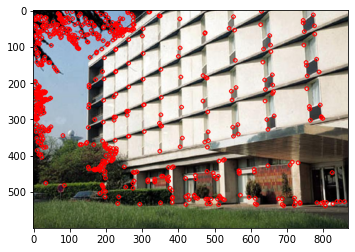

In [84]:
src = cv2.imread('./data/building.jpg')

if src is None:
    print("Image load failed")
    sys.exit()

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

tm = cv2.TickMeter()
tm.start()

fast = cv2.FastFeatureDetector_create(60, nonmaxSuppression=True)
#fast = cv2.FastFeatureDetector_create(50, nonmaxSuppression=False)
keypoints = fast.detect(gray)

tm.stop()
print("time to detect(Harris Corner) : %4.3f ms."%tm.getTimeMilli())



dst = np.copy(src)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

for keypoint in keypoints:
    pt = int(keypoint.pt[0]), int(keypoint.pt[1])
    cv2.circle(dst, pt, 5, (255, 0, 0), 2)
    
plt.imshow(dst)

#### Workshop : waffle.jpg

time to detect(Harris Corner) : 0.384 ms.


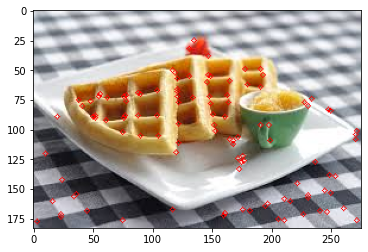

In [88]:
src = cv2.imread('./data/waffle.jpg')

if src is None:
    print("Image load failed")
    sys.exit()

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

tm = cv2.TickMeter()
tm.start()

fast = cv2.FastFeatureDetector_create(55, nonmaxSuppression=True)
#fast = cv2.FastFeatureDetector_create(50, nonmaxSuppression=False)
keypoints = fast.detect(gray)

tm.stop()
print("time to detect(Harris Corner) : %4.3f ms."%tm.getTimeMilli())



dst = np.copy(src)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

for keypoint in keypoints:
    pt = int(keypoint.pt[0]), int(keypoint.pt[1])
    cv2.circle(dst, pt, 2, (255, 0, 0), 1)
    
plt.imshow(dst)